# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Novariya Br Saragih
- **Email:** novariya.saragih15@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/novariyasaragih/

## Menentukan Pertanyaan Bisnis

1. Bagaimana statistika dan berapa jumlah perbedaan sepeda yang dipinjam pada hari kerja dan hari libur?

2. Apakah ada pola dalam ketersediaan sepeda berdasarkan jam, hari, atau musim?

3. Bagaimana perbedaan dalam penggunaan sepeda antara jam di hari kerja dengan jam di akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Data wrangling adalah proses pengolahan dan transformasi data mentah menjadi format yang lebih sesuai untuk analisis atau penggunaan lainnya. Tujuan utama dari data wrangling adalah untuk membersihkan, mengubah, dan mengorganisir data sehingga dapat diolah dengan lebih efisien dan efektif. Tahap data wrangling yang umum meliputi gathering data, assessing data, dan cleaning data.

### Gathering Data

In [200]:
# Load data
hour_data = pd.read_csv('hour.csv')
day_data = pd.read_csv('day.csv')

In [201]:
# Merge Data
# Menggabungkan data hour dan day
combined_data = pd.concat([hour_data, day_data], axis=0)

In [202]:
# Structure of the dataset
print(hour_data.head())
print(day_data.head())
print(combined_data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   

### Assessing Data

In [203]:
# Data Types
print(hour_data.dtypes)
print(day_data.dtypes)
print(combined_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr            float64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atem

In [204]:
# Display data information
print(hour_data.info())
print(day_data.info())
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

In [205]:
# Check Missing Values
print(hour_data.isnull().sum())
print(day_data.isnull().sum())
print(combined_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant         0
dteday          0
season          0
yr              0
mnth            0
hr            731
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64


In [206]:
# Check Duplicate Values
print(hour_data.duplicated().sum())
print(day_data.duplicated().sum())
print(combined_data.duplicated().sum())

0
0
0


In [207]:
# Data Description
print(hour_data.describe())
print(day_data.describe())
print(combined_data.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

### Cleaning Data

In [208]:
# Remove Missing Values
combined_data.dropna(inplace=True)

In [209]:
# Remove Duplicate Values
combined_data.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

<ipython-input-210-0219e80c5560>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_data.corr()


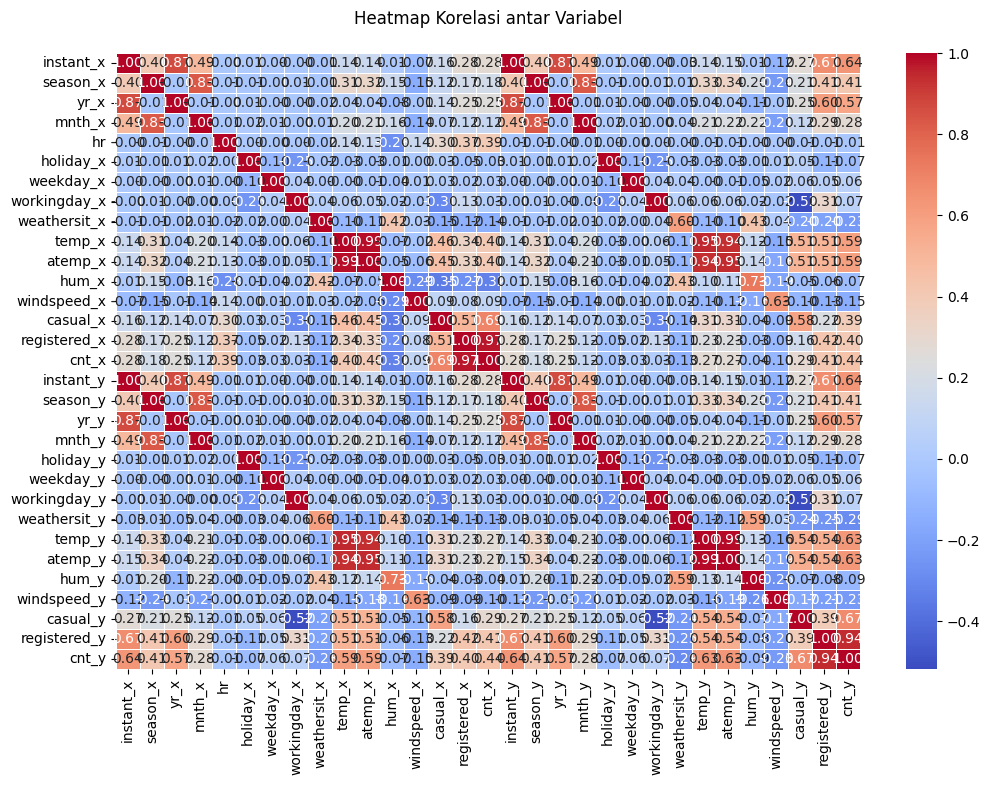

In [210]:
# Menggabungkan kedua dataframe
combined_data = pd.merge(hour_data, day_data, on='dteday')

# Korelasi antar variabel
correlation_matrix = combined_data.corr()

# Plotting heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antar Variabel\n')
plt.show()

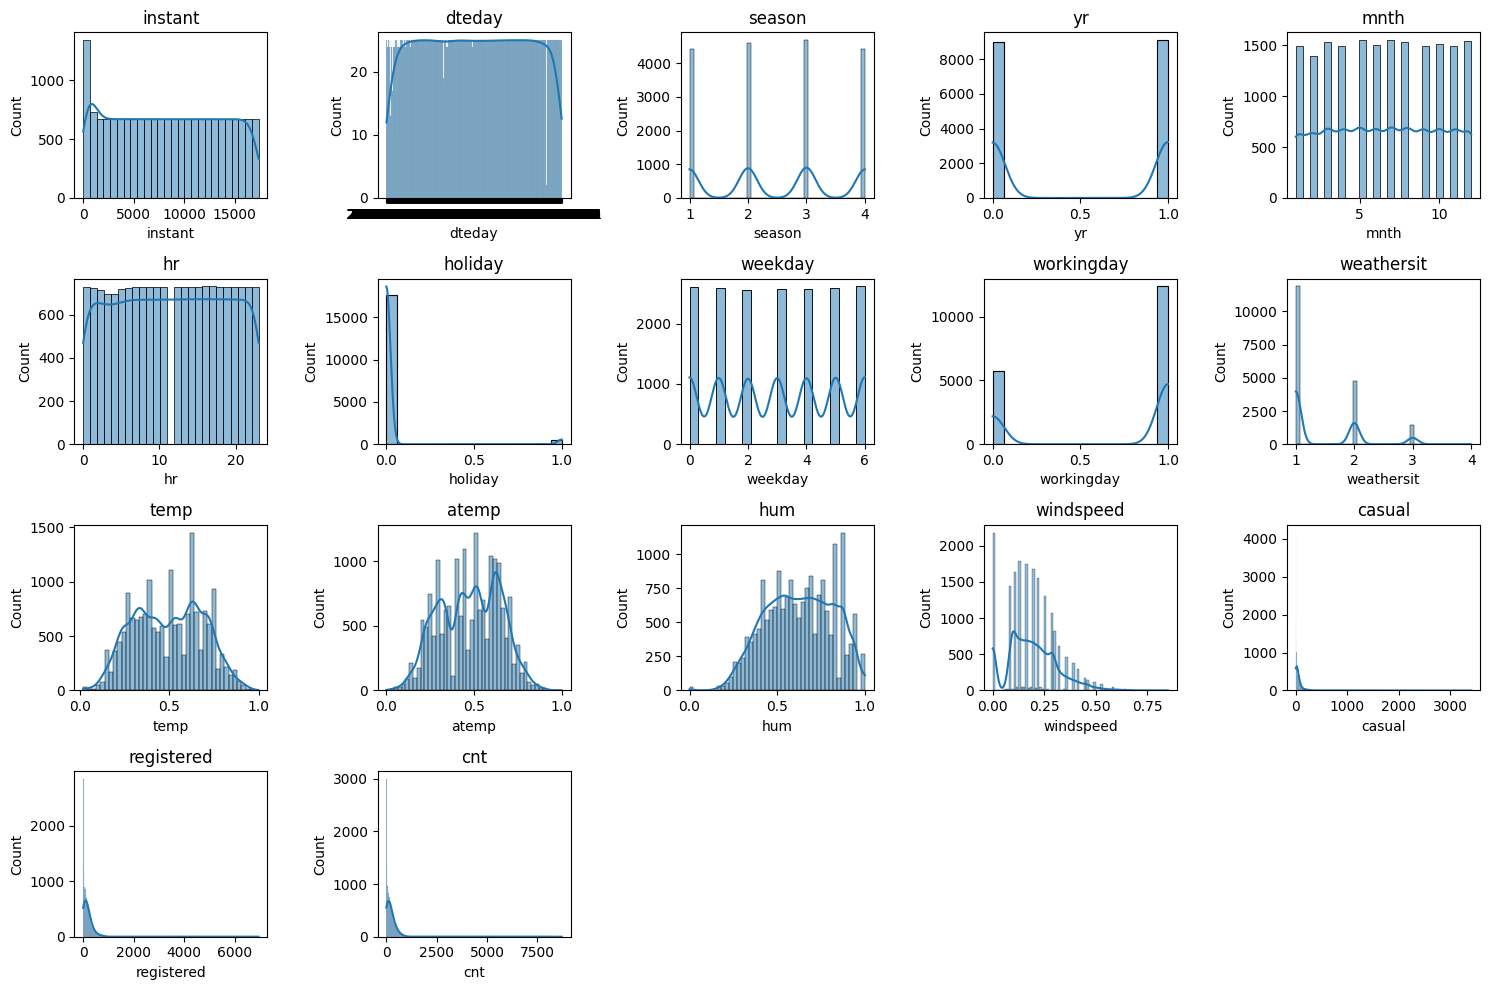

In [211]:

# Menampilkan histogram distribusi setiap variabel
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:20]):  # Memilih 20 kolom pertama
    plt.subplot(4, 5, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

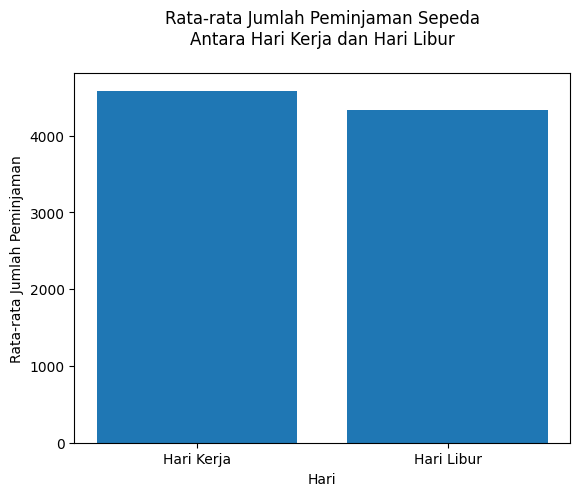


Statistik jumlah peminjaman sepeda:
            count         mean          std    min      25%     50%     75%  \
workingday                                                                    
0           231.0  4330.168831  2052.141245  605.0  2710.50  4459.0  5907.5   
1           500.0  4584.820000  1878.415583   22.0  3344.25  4582.0  5987.5   

               max  
workingday          
0           8714.0  
1           8362.0  

Perbedaan jumlah peminjaman sepeda antara hari kerja dan hari libur: 254.65116883116843


In [212]:
# Menghitung rata-rata jumlah peminjaman sepeda pada hari kerja dan hari libur
avg_rentals_workingday = day_data[day_data['workingday'] == 1]['cnt'].mean()
avg_rentals_holiday = day_data[day_data['workingday'] == 0]['cnt'].mean()

# Plotting bar chart
plt.bar(['Hari Kerja', 'Hari Libur'], [avg_rentals_workingday, avg_rentals_holiday])
plt.title('Rata-rata Jumlah Peminjaman Sepeda\nAntara Hari Kerja dan Hari Libur\n')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Peminjaman')

plt.show()

# Menampilkan statistika
print("\nStatistik jumlah peminjaman sepeda:")
print(day_data.groupby('workingday')['cnt'].describe())

# Menghitung jumlah perbedaan sepeda yang dipinjam di hari kerja dan di hari libur
diff_rentals = avg_rentals_workingday - avg_rentals_holiday
print("\nPerbedaan jumlah peminjaman sepeda antara hari kerja dan hari libur:", diff_rentals)

### Pertanyaan 2:

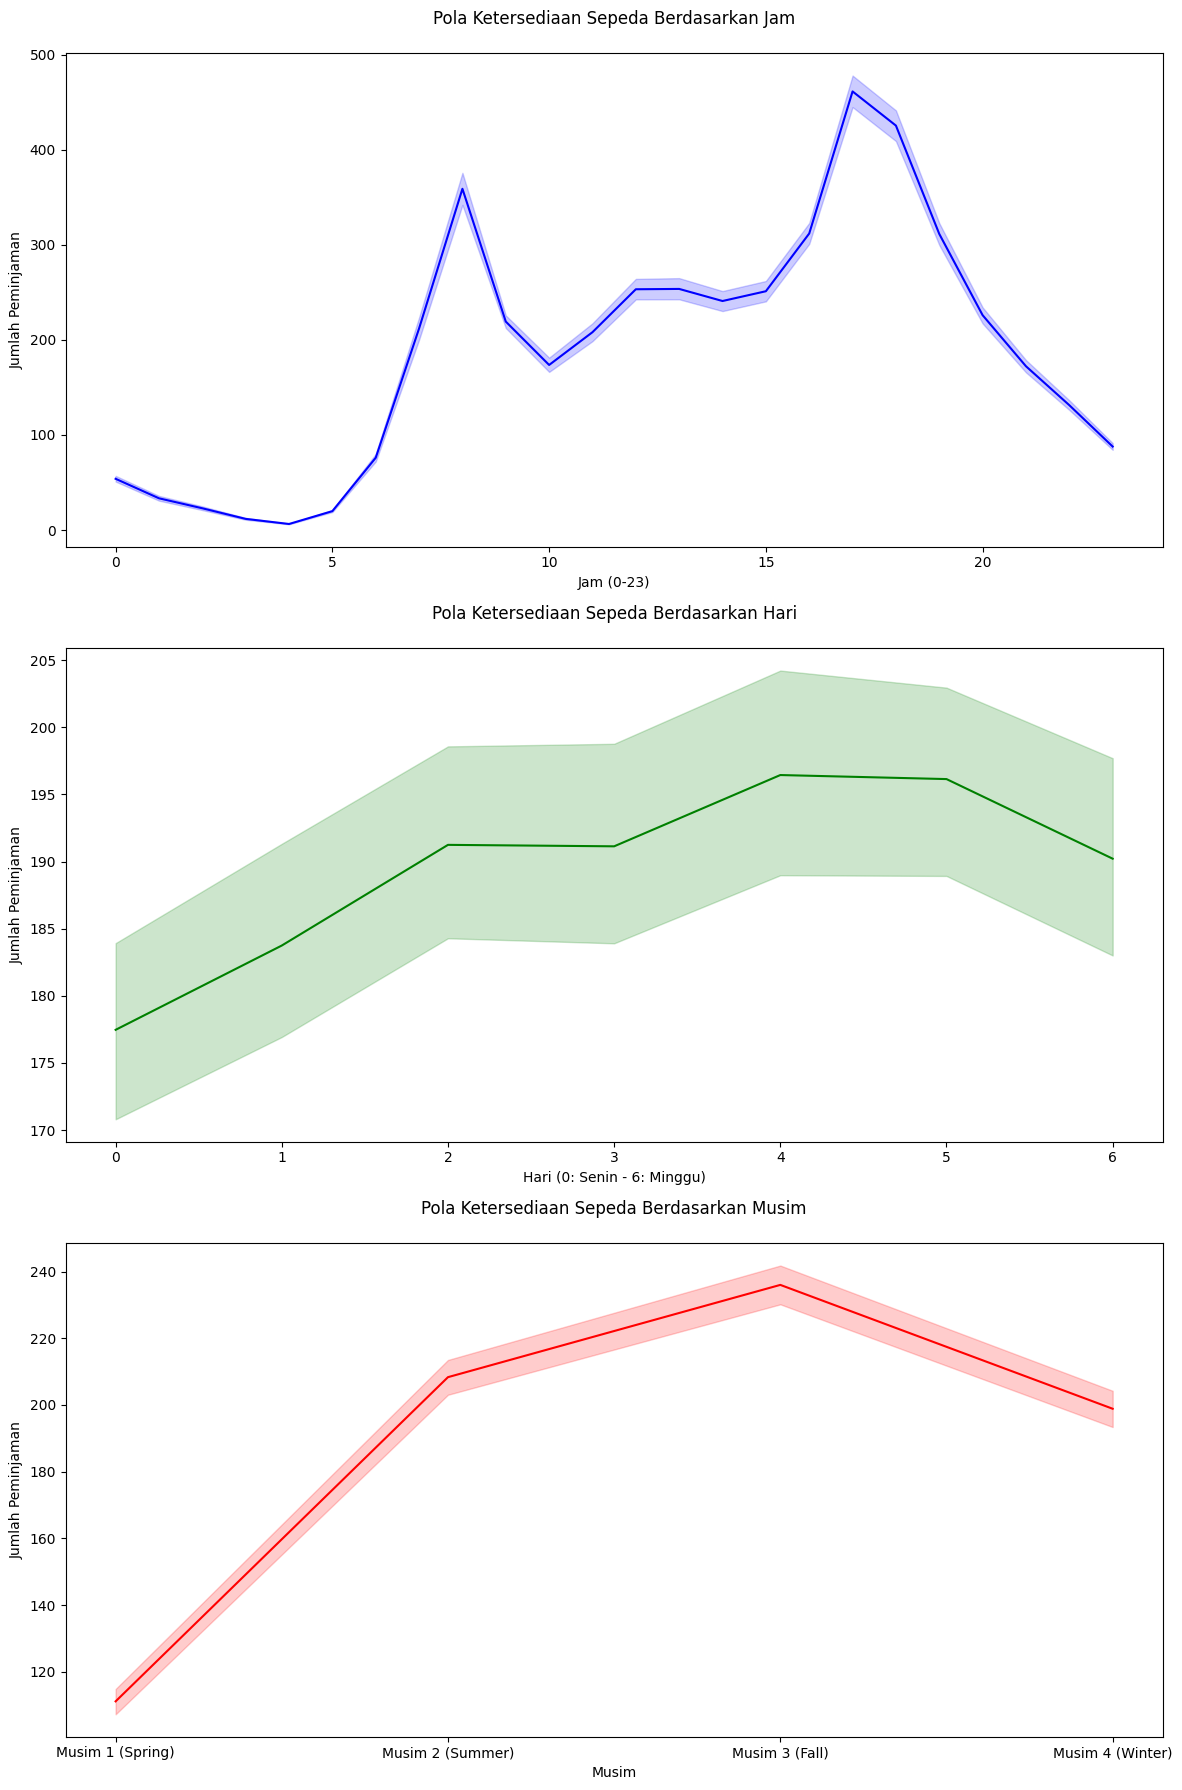

In [213]:
# Membuat subplot untuk visualisasi berdasarkan jam, hari, dan musim
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plotting ketersediaan sepeda berdasarkan jam
sns.lineplot(ax=axes[0], x='hr', y='cnt', data=hour_data, color='blue')
axes[0].set_title('Pola Ketersediaan Sepeda Berdasarkan Jam\n')
axes[0].set_xlabel('Jam (0-23)')
axes[0].set_ylabel('Jumlah Peminjaman')

# Plotting ketersediaan sepeda berdasarkan hari
sns.lineplot(ax=axes[1], x='weekday', y='cnt', data=hour_data, color='green')
axes[1].set_title('Pola Ketersediaan Sepeda Berdasarkan Hari\n')
axes[1].set_xlabel('Hari (0: Senin - 6: Minggu)')
axes[1].set_ylabel('Jumlah Peminjaman')

# Plotting ketersediaan sepeda berdasarkan musim
sns.lineplot(ax=axes[2], x='season', y='cnt', data=hour_data, color='red')
axes[2].set_title('Pola Ketersediaan Sepeda Berdasarkan Musim\n')
axes[2].set_xlabel('Musim')
axes[2].set_ylabel('Jumlah Peminjaman')
axes[2].set_xticks(hour_data['season'].unique()) # Mengatur label musim sesuai data
axes[2].set_xticklabels(['Musim 1 (Spring)', 'Musim 2 (Summer)', 'Musim 3 (Fall)', 'Musim 4 (Winter)']) # Mengganti label musim

plt.tight_layout()
plt.show()


### Pertanyaan 3

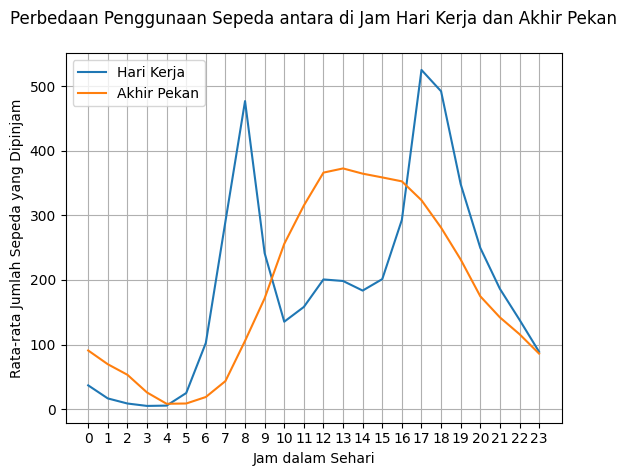

In [214]:
# Perbedaan penggunaan sepeda antara jam di hari kerja dan jam di akhir pekan
hourly_usage_weekday = hour_data[hour_data['workingday'] == 1].groupby('hr')['cnt'].mean()
hourly_usage_weekend = hour_data[hour_data['workingday'] == 0].groupby('hr')['cnt'].mean()

# Visualisasi
plt.plot(hourly_usage_weekday.index, hourly_usage_weekday.values, label='Hari Kerja')
plt.plot(hourly_usage_weekend.index, hourly_usage_weekend.values, label='Akhir Pekan')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Sepeda yang Dipinjam')
plt.title('Perbedaan Penggunaan Sepeda antara di Jam Hari Kerja dan Akhir Pekan\n')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


## Conclusion


1. Jumlah sepeda yang dipinjam cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Perbedaan jumlah peminjaman sepeda antara hari kerja dan hari libur yaitu 254.65116883116843. Tujuan analisis ini adalah untuk memahami pola peminjaman sepeda antara hari kerja dan hari libur. Hal ini dapat membantu dalam pengambilan keputusan terkait manajemen penyediaan sepeda, seperti menyesuaikan jumlah sepeda yang tersedia pada hari-hari tertentu atau menentukan strategi pemasaran untuk meningkatkan penggunaan sepeda pada hari-hari tertentu. Dengan demikian, analisis ini dapat memberikan wawasan yang berguna bagi penyedia layanan sepeda untuk mengoptimalkan sumber daya dan meningkatkan kepuasan pelanggan.


2. Terdapat pola ketersediaan sepeda berdasarkan jam dalam sehari, hari dalam seminggu, dan musim. Pola ketersediaan sepeda berdasarkan jam yaitu peminjaman sepeda paling banyak terjadi pada sore hari, sedangkan peminjaman sepeda paling sedikit terjadi pada tengah malam. Pola ketersediaan sepeda berdasarkan hari yaitu jumlah peminjaman sepeda pada hari senin paling sedikit dan pada hari jumat paling banyak. Pola ketersediaan sepeda berdasarkan musim yaitu jumlah peminjaman sepeda paling banyak pada musim gugur (musim 3) dan paling sedikit pada musim dingin (musim 4). Dengan demikian, dapat disimpulkan bahwa ada pola peminjaman sepeda berdasarkan jam, hari, dan musim. Hal ini dapat digunakan untuk memprediksi kebutuhan sepeda dan melakukan perencanaan kapasitas penyediaan sepeda.


3. Pada hari kerja pola penggunaan sepeda menunjukkan dua puncak yaitu pada pagi hari sekitar jam 7-9, kemungkinan saat orang pergi ke tempat kerja, dan pada sore hari sekitar jam 16-18, saat orang pulang kerja. Pada akhir pekan pola penggunaan sepeda lebih merata sepanjang hari, tanpa adanya puncak yang jelas seperti pada hari kerja. Hal ini menunjukkan bahwa penggunaan sepeda di akhir pekan cenderung lebih santai dan mungkin terdistribusi secara lebih merata sepanjang hari. Dengan demikian, dapat disimpulkan bahwa terdapat perbedaan signifikan dalam pola penggunaan sepeda antara di jam hari kerja dan di jam akhir pekan. Hal ini penting untuk dipertimbangkan dalam perencanaan layanan penyewaan sepeda, pengaturan inventaris, dan strategi pemasaran yang sesuai dengan preferensi pengguna pada hari tertentu.





